In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False    ###  正常显示负号
np.set_printoptions(suppress=True)  # 取消科学技术法
%matplotlib inline

In [3]:
filepath = 'F:/BaiduNetdiskDownload/adevertisment/gxs/round1_iflyad_train.txt'
data = pd.read_table(filepath)

In [4]:
data.head()

,instance_id,time,city,province,user_tags,carrier,devtype,make,model,nnt,os,osv,os_name,adid,advert_id,orderid,advert_industry_inner,campaign_id,creative_id,creative_tp_dnf,app_cate_id,f_channel,app_id,inner_slot_id,creative_type,creative_width,creative_height,creative_is_jump,creative_is_download,creative_is_js,creative_is_voicead,creative_has_deeplink,app_paid,advert_name,click
0,86294719979897807,2190219034,137103102105100,137103102100100,NaN,1,2,HUAWEI,HUAWEI-CAZ-AL10,1,2,7.0.0,android,1560128,230000063,3010798,102400_102401,1000023,2338420,8390267734059046014,107.0,NaN,2089229.0,xf_275C061483984E075832A4373BDDF27B,8,1280,720,True,False,False,False,False,False,B4734117F35EE97F,0
1,2699289844928136052,2190221070,137105101100100,137105101100100,"2100191,2100078,3001825,,3001781,3001791,3001795,3001799,3001955,3002047,3002071,3002095,3002169,3002265,3002311,3002315,3002329,3002347,3002493,3002559,3002573,3002613,3002633,3002677,3002685,3002753,3002847,3002849,3002901,3002903,3003055,3003141,3003147,3003255,3003261,3003313,3003321,3003349,3003323,3003379,3003389,3003417,,3003443,3003457,3003489,3003509,3003537,3003559,3003575,3003605,3003635,3003679,3003703,3003709,3003715,3003727,3003745,3003747,3003769,3003779,3003819,3003841,300384...",3,2,Xiaomi,Redmi Note 4,1,2,6.0,android,1488859,230000063,2311397,102400_102401,1000023,2310417,8390208550469153745,108.0,NaN,2070079.0,xf_D84DAB691E2E08C5B80D2FF5135F886E,8,960,640,True,False,False,False,False,False,B4734117F35EE97F,0
2,3117527168445845752,2190219793,137103104111100,137103104100100,NaN,3,2,OPPO,OPPO+R11s,1,2,7.1.1,android,1537089,230000065,3008491,101700_101704,1000021,2337017,8390430283595430291,100.0,NaN,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,False,False,False,E257895F74792E81,0
3,3398484891050993371,2190221704,137103102113100,137103102100100,"2100098,gd_2100000,3001791,3001795,3002193,3002329,3002559,3002749,3002747,3003379,3003509,3003537,3003559,3003659,3003679,3003715,3003779,,3003843,3003851,3003863,3003865,3003869,3003875,3003939,3004059,3004081,3004089,3004093,3004095,3004147,3004149,3004153,3004224,3004214,3004256,3004258,3004262,3004266,3004430,3004434,3004500,3004506",0,2,NaN,OPPO A57,1,2,6.0.1,android,1577884,230001710,3011304,101900_101902,1003544,2342152,8390229093704413749,100.0,iqy_2,2071234.0,iqy_1000000000381-1-15-15,3,1280,720,True,False,False,False,False,False,0A421D7B11EABFC5,0
4,2035477570591176488,2190220024,137103102109100,137103102100100,NaN,1,2,Apple,iPhone 7,3,1,11.1.1,ios,1432367,230000063,2304491,102400_102401,1000023,2305409,8390208550469153745,103.0,NaN,1030051.0,xf_6C4DCB36DBE7EB12CE55EDF319FF8D93,8,960,640,True,False,False,False,False,False,B4734117F35EE97F,0


In [8]:
# data.info()
data.nunique()
# data.groupby('province')['click'].agg({'mean','count'})

instance_id              1001650
time                      443670
city                         333
province                      35
user_tags                 464200
carrier                        4
devtype                        4
make                        3140
model                      14053
nnt                            6
os                             3
osv                          300
os_name                        3
adid                        2079
advert_id                     38
orderid                      936
advert_industry_inner         24
campaign_id                   64
creative_id                  862
creative_tp_dnf               40
app_cate_id                   22
f_channel                     73
app_id                       438
inner_slot_id               1169
creative_type                  5
creative_width                20
creative_height               13
creative_is_jump               2
creative_is_download           2
creative_is_js                 1
creative_i

In [9]:
#处理缺失值
data=data.fillna(-1)   #将空值设为-1

In [10]:
# 处理时间
data = data.sort_values('time')
initial_time = data['time'].min() 
data['day'] = ((data['time'].values - initial_time) / (3600 *24)).astype(int)
data['hour'] =( (data['time'].values - initial_time - data['day'].values * 3600 * 24) / 3600).astype(int)

In [13]:
# 将各特征中属于样本数少于20的类别合并为其他类
threshold = 20
small_category_list = []
from collections import Counter
number = Counter(data.make)
for key,item in number.items():
    if item > threshold:
        continue
    small_category_list.append(key)

In [15]:
##替换
def make_change(make):
    if make in small_category_list:
        make = -1
    else:
        make = make
    return make

In [16]:
data['make'] = data.make.apply(make_change)

In [72]:
data.head()

,instance_id,time,city,province,user_tags,carrier,devtype,make,model,nnt,os,osv,os_name,adid,advert_id,orderid,advert_industry_inner,campaign_id,creative_id,creative_tp_dnf,app_cate_id,f_channel,app_id,inner_slot_id,creative_type,creative_width,creative_height,creative_is_jump,creative_is_download,creative_has_deeplink,advert_name,day,hour,area,ad_prefix,advert_industry_inner1,advert_industry_inner2,click
0,4871560165930991338,2190038403,106105106,106105,"3003779,3003779,3003843,3003851,3003863,3003865,3003869,3003871,3003875,3003877,2100237,2100078,3003923,3003939,3004059,3004081,3004089,3004093,3004095,3004153,3004214,3004262,3004406,3004430,3004434,3004504",3,2,vivo,vivo X20,4,2,7.1.1,android,1574532,230000063,3011352,102400_102401,1000023,2316955,8390430283595430291,108.0,-1,2090618.0,xf_D0CF499C7D134CDF81DF9D544CC557FB,8,960,640,True,False,False,B4734117F35EE97F,0,0,614400,157,102400,102401,0
1,1156288606795451147,2190038408,101105106,101105,"3003779,3003843,3003845,3003851,3003863,3003871,3003877,3003939,3004059,3004081,3004089,3004093,3004095,3004147,3004149,3004153,3004161,3004214,3004266,3004430,3004434",2,2,vivo,vivo+Y79A,4,2,7.1.2,android,1549532,230000063,3009080,102400_102401,1000023,2334795,8390430283595430291,100.0,-1,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,B4734117F35EE97F,0,0,614400,154,102400,102401,0
2,2886794733240524743,2190038409,104102106,104102,-1,1,2,Apple,iPhone 5s (Global),3,1,8.1.1,ios,1576184,230001696,3011756,101000_101002,1003456,2341772,8390272894417697957,103.0,-1,1030051.0,xf_A6B1A635D568FB987B7CF391E0F54325,5,320,480,True,False,False,310405E93895BD58,0,0,153600,157,101000,101002,0
3,2117825034610349718,2190038409,104104106,104104,"2100041,2100042,2100030,2100198,2100265,2100023,2100284,2100235,gd_2100000,2100085,2100254,2100595,2101161,2100533,2100084,2101347,2100130,2100501,2100121,2100028,2100113,2101058,2100138,2100017,2100012,2100963,2100078,2100126,2100094,2100013,2101172,2100151,3001747,3001765,3001793,3001797,3001837,3001851,3001879,3001893,3001925,3001927,3001951,3001975,3001985,3001987,3002031,3002033,3002041,3...",1,2,OPPO,OPPO%252BR9tm,4,2,5.1,android,1559244,230000833,3006065,4_100206,1002835,2340218,8390422898336367555,107.0,-1,1100001.0,xf_1587571EC0815824E91C5686EDCAC4A7,2,100,640,True,False,False,862FF2E9B0AD4C14,0,0,64000,155,4,100206,0
4,5597056059236856846,2190038409,105102117,105102,"3003273,3003339,3003379,3003537,3003559,3003715,3003779,3003843,3003851,3003863,3003865,3003869,3003871,3003875,3003877,2100191,3004059,3004081,3004089,3004153,3004214,3004222,3004262,3004266,3004272,3004314,3004430,3004434",1,2,vivo,vivo Y67,1,2,6.0,android,1576214,230001696,3011762,101000_101002,1003456,2341782,8390404739335806554,100.0,-1,2081009.0,xf_369A1421E21367AEFDEDE71A1C54B766,5,300,300,True,False,False,310405E93895BD58,0,0,90000,157,101000,101002,0


In [ ]:
# 分割广告行业特征
def cut_word1(word):
    pos = word.find('_')
    if pos != -1:
        Name=word[: pos]
    return Name

def cut_word2(word):
    pos = word.find(',')
    if pos != -1:
        Position=word[pos+1:]
    return Position

data['advert_industry_inner_1'] = data['advert_industry_inner'].apply(cut_word1)
data['advert_industry_inner_2'] = data['advert_industry_inner'].apply(cut_word2)
# 提取广告ID前3位
data['ad_prefix']=data['adid'].apply(lambda x: int(str(x)[:3]))

#计算广告面积
data['area'] = data['creative_height'] * data['creative_width']

In [17]:
##新数据做逻辑回归
filepath = 'F:/BaiduNetdiskDownload/adevertisment/advertisement.csv'
data = pd.read_csv(filepath)

In [21]:
data.head()

,instance_id,time,city,province,user_tags,carrier,devtype,make,model,nnt,os,osv,os_name,adid,advert_id,orderid,advert_industry_inner,campaign_id,creative_id,creative_tp_dnf,app_cate_id,f_channel,app_id,inner_slot_id,creative_type,creative_width,creative_height,creative_is_jump,creative_is_download,creative_has_deeplink,advert_name,day,hour,area,ad_prefix,advert_industry_inner1,advert_industry_inner2,click
0,4871560165930991338,2190038403,106105106,106105,"3003779,3003779,3003843,3003851,3003863,3003865,3003869,3003871,3003875,3003877,2100237,2100078,3003923,3003939,3004059,3004081,3004089,3004093,3004095,3004153,3004214,3004262,3004406,3004430,3004434,3004504",3,2,Vivo,vivo X20,4,2,7.1.1,android,1574532,230000063,3011352,102400_102401,1000023,2316955,8390430283595430291,108.0,-1,2090618.0,xf_D0CF499C7D134CDF81DF9D544CC557FB,8,960,640,True,False,False,B4734117F35EE97F,0,0,614400,157,102400,102401,0
1,1156288606795451147,2190038408,101105106,101105,"3003779,3003843,3003845,3003851,3003863,3003871,3003877,3003939,3004059,3004081,3004089,3004093,3004095,3004147,3004149,3004153,3004161,3004214,3004266,3004430,3004434",2,2,Vivo,vivo+Y79A,4,2,7.1.2,android,1549532,230000063,3009080,102400_102401,1000023,2334795,8390430283595430291,100.0,-1,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,B4734117F35EE97F,0,0,614400,154,102400,102401,0
2,2886794733240524743,2190038409,104102106,104102,-1,1,2,Apple,iPhone 5s (Global),3,1,8.1.1,ios,1576184,230001696,3011756,101000_101002,1003456,2341772,8390272894417697957,103.0,-1,1030051.0,xf_A6B1A635D568FB987B7CF391E0F54325,5,320,480,True,False,False,310405E93895BD58,0,0,153600,157,101000,101002,0
3,2117825034610349718,2190038409,104104106,104104,"2100041,2100042,2100030,2100198,2100265,2100023,2100284,2100235,gd_2100000,2100085,2100254,2100595,2101161,2100533,2100084,2101347,2100130,2100501,2100121,2100028,2100113,2101058,2100138,2100017,2100012,2100963,2100078,2100126,2100094,2100013,2101172,2100151,3001747,3001765,3001793,3001797,3001837,3001851,3001879,3001893,3001925,3001927,3001951,3001975,3001985,3001987,3002031,3002033,3002041,3002053,3002055,3002059,3002069,3002071,3002079,3002095,3002109,3002181,3002183,3002185,3002195,30022...",1,2,Oppo,OPPO%252BR9tm,4,2,5.1,android,1559244,230000833,3006065,4_100206,1002835,2340218,8390422898336367555,107.0,-1,1100001.0,xf_1587571EC0815824E91C5686EDCAC4A7,2,100,640,True,False,False,862FF2E9B0AD4C14,0,0,64000,155,4,100206,0
4,5597056059236856846,2190038409,105102117,105102,"3003273,3003339,3003379,3003537,3003559,3003715,3003779,3003843,3003851,3003863,3003865,3003869,3003871,3003875,3003877,2100191,3004059,3004081,3004089,3004153,3004214,3004222,3004262,3004266,3004272,3004314,3004430,3004434",1,2,Vivo,vivo Y67,1,2,6.0,android,1576214,230001696,3011762,101000_101002,1003456,2341782,8390404739335806554,100.0,-1,2081009.0,xf_369A1421E21367AEFDEDE71A1C54B766,5,300,300,True,False,False,310405E93895BD58,0,0,90000,157,101000,101002,0


In [19]:
data.columns

Index(['Unnamed: 0', 'instance_id', 'time', 'city', 'province', 'user_tags',
       'carrier', 'devtype', 'make', 'model', 'nnt', 'os', 'osv', 'os_name',
       'adid', 'advert_id', 'orderid', 'advert_industry_inner', 'campaign_id',
       'creative_id', 'creative_tp_dnf', 'app_cate_id', 'f_channel', 'app_id',
       'inner_slot_id', 'creative_type', 'creative_width', 'creative_height',
       'creative_is_jump', 'creative_is_download', 'creative_has_deeplink',
       'advert_name', 'day', 'hour', 'area', 'ad_prefix',
       'advert_industry_inner1', 'advert_industry_inner2', 'click'],
      dtype='object')

In [20]:
del data['Unnamed: 0']

In [115]:
data.to_csv('F:/BaiduNetdiskDownload/adevertisment/advertisement.csv')

In [85]:
##品牌归一
data['make'] = data.make.str.lower()
data['make'] = data.make.str.title()

In [87]:
#apple
def make_change(make):
    if make[:6] == 'Iphone':
        make = 'Apple'
    else:
        make = make
    return make

In [90]:
#Oppo
def Oppo_change(make):
    if make[:4] == 'Oppo':
        make = 'Oppo'
    else:
        make = make
    return make

def Vivo_change(make):
    if make[:4] == 'Oppo':
        make = 'Oppo'
    else:
        make = make
    return make

In [88]:
data['make'] = data.make.apply(make_change)

In [91]:
data['make'] = data.make.apply(Oppo_change)
data['make'] = data.make.apply(Vivo_change)

In [55]:
data[['province', 'city']] = data[['province','city']].astype(str)

In [58]:
##地理信息简化
def province_change(province):
    if province == '0':
        province =province
    else:
        province = province[3:9]
    return province

def city_change(city):
    if city == '0':
        city = city
    else:
        city = city[3:12]
    return city

In [59]:
data['province'] = data.province.apply(province_change)
data['city'] = data.city.apply(city_change)

In [114]:
data.head()

,instance_id,time,city,province,user_tags,carrier,devtype,make,model,nnt,os,osv,os_name,adid,advert_id,orderid,advert_industry_inner,campaign_id,creative_id,creative_tp_dnf,app_cate_id,f_channel,app_id,inner_slot_id,creative_type,creative_width,creative_height,creative_is_jump,creative_is_download,creative_has_deeplink,advert_name,day,hour,area,ad_prefix,advert_industry_inner1,advert_industry_inner2,click
0,4871560165930991338,2190038403,106105106,106105,"3003779,3003779,3003843,3003851,3003863,3003865,3003869,3003871,3003875,3003877,2100237,2100078,3003923,3003939,3004059,3004081,3004089,3004093,3004095,3004153,3004214,3004262,3004406,3004430,3004434,3004504",3,2,Vivo,vivo X20,4,2,7.1.1,android,1574532,230000063,3011352,102400_102401,1000023,2316955,8390430283595430291,108.0,-1,2090618.0,xf_D0CF499C7D134CDF81DF9D544CC557FB,8,960,640,True,False,False,B4734117F35EE97F,0,0,614400,157,102400,102401,0
1,1156288606795451147,2190038408,101105106,101105,"3003779,3003843,3003845,3003851,3003863,3003871,3003877,3003939,3004059,3004081,3004089,3004093,3004095,3004147,3004149,3004153,3004161,3004214,3004266,3004430,3004434",2,2,Vivo,vivo+Y79A,4,2,7.1.2,android,1549532,230000063,3009080,102400_102401,1000023,2334795,8390430283595430291,100.0,-1,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,B4734117F35EE97F,0,0,614400,154,102400,102401,0
2,2886794733240524743,2190038409,104102106,104102,-1,1,2,Apple,iPhone 5s (Global),3,1,8.1.1,ios,1576184,230001696,3011756,101000_101002,1003456,2341772,8390272894417697957,103.0,-1,1030051.0,xf_A6B1A635D568FB987B7CF391E0F54325,5,320,480,True,False,False,310405E93895BD58,0,0,153600,157,101000,101002,0
3,2117825034610349718,2190038409,104104106,104104,"2100041,2100042,2100030,2100198,2100265,2100023,2100284,2100235,gd_2100000,2100085,2100254,2100595,2101161,2100533,2100084,2101347,2100130,2100501,2100121,2100028,2100113,2101058,2100138,2100017,2100012,2100963,2100078,2100126,2100094,2100013,2101172,2100151,3001747,3001765,3001793,3001797,3001837,3001851,3001879,3001893,3001925,3001927,3001951,3001975,3001985,3001987,3002031,3002033,3002041,3002053,3002055,3002059,3002069,3002071,3002079,3002095,3002109,3002181,3002183,3002185,3002195,30022...",1,2,Oppo,OPPO%252BR9tm,4,2,5.1,android,1559244,230000833,3006065,4_100206,1002835,2340218,8390422898336367555,107.0,-1,1100001.0,xf_1587571EC0815824E91C5686EDCAC4A7,2,100,640,True,False,False,862FF2E9B0AD4C14,0,0,64000,155,4,100206,0
4,5597056059236856846,2190038409,105102117,105102,"3003273,3003339,3003379,3003537,3003559,3003715,3003779,3003843,3003851,3003863,3003865,3003869,3003871,3003875,3003877,2100191,3004059,3004081,3004089,3004153,3004214,3004222,3004262,3004266,3004272,3004314,3004430,3004434",1,2,Vivo,vivo Y67,1,2,6.0,android,1576214,230001696,3011762,101000_101002,1003456,2341782,8390404739335806554,100.0,-1,2081009.0,xf_369A1421E21367AEFDEDE71A1C54B766,5,300,300,True,False,False,310405E93895BD58,0,0,90000,157,101000,101002,0


In [113]:
#advert_id 处理（后续）
len(data.inner_slot_id.unique())

1169

In [107]:
# data.groupby(['app_cate_id'])['click'].agg(['mean','count']).sort_values(['count'],ascending = False).reset_index()

In [22]:
day0 = data.loc[data['day'] == 0].groupby('hour')['click'].agg(['mean','count'])
day1 = data.loc[data['day'] == 1].groupby('hour')['click'].agg({'mean','count'})
day2 = data.loc[data['day'] == 2].groupby('hour')['click'].agg({'mean','count'})
day3 = data.loc[data['day'] == 3].groupby('hour')['click'].agg({'mean','count'})
day4 = data.loc[data['day'] == 4].groupby('hour')['click'].agg({'mean','count'})
day5 = data.loc[data['day'] == 5].groupby('hour')['click'].agg({'mean','count'})
day6 = data.loc[data['day'] == 6].groupby('hour')['click'].agg({'mean','count'})

Text(0.5,1,'点击率和时间变化图')

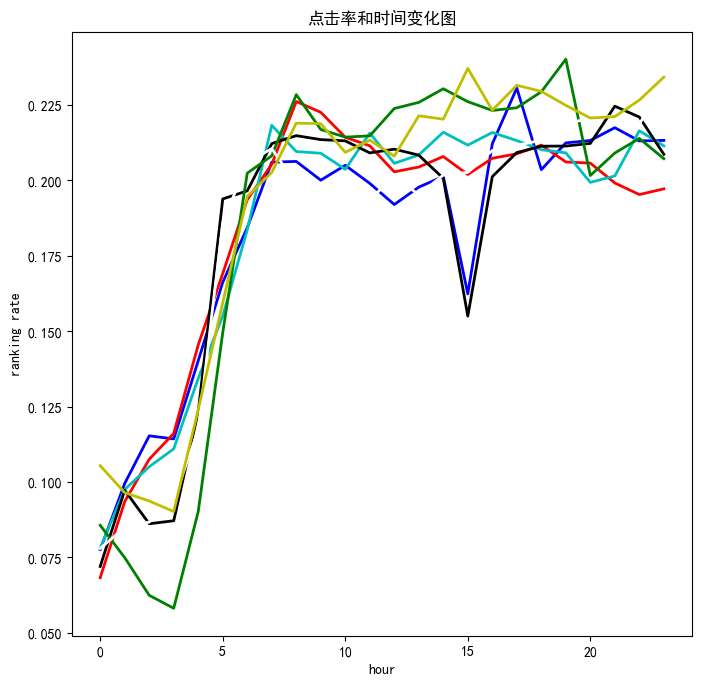

In [23]:
fig=plt.figure(figsize=(8,8),dpi=100)
plt.plot(day0.index,day0['mean'],lw=2,c = 'b')
plt.plot(day1.index,day1['mean'],lw=2,c = 'r')
plt.plot(day2.index,day2['mean'],lw=2,c = 'c')
plt.plot(day3.index,day3['mean'],lw=2,c = 'k')
plt.plot(day4.index,day4['mean'],lw=2,c = 'g')
plt.plot(day5.index,day5['mean'],lw=2,c = 'w')
plt.plot(day6.index,day6['mean'],lw=2,c = 'y')
plt.xlabel('hour')
plt.ylabel('ranking rate')
plt.title('点击率和时间变化图')

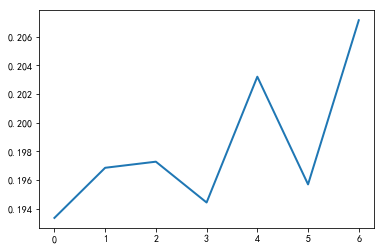

In [120]:
day = data.groupby(['day'])['click'].agg(['mean','count'])
plt.plot(day.index, day['mean'], lw =2 )
##广告点击率> 20%就算不错了

In [26]:
data.click.value_counts()

0    802863
1    198787
Name: click, dtype: int64

In [27]:
#抽取全部click为1的数据
data_click1 = data[data['click']==1]

In [29]:
data_click1.tail()

,instance_id,time,city,province,user_tags,carrier,devtype,make,model,nnt,os,osv,os_name,adid,advert_id,orderid,advert_industry_inner,campaign_id,creative_id,creative_tp_dnf,app_cate_id,f_channel,app_id,inner_slot_id,creative_type,creative_width,creative_height,creative_is_jump,creative_is_download,creative_has_deeplink,advert_name,day,hour,area,ad_prefix,advert_industry_inner1,advert_industry_inner2,click
1001636,3352366415059089670,2190643072,106101101,106101,"2100041,gd_2100001,3001771,3001791,3001873,3001881,3001889,3001899,3001965,3002003,3002071,3002183,3002199,3002219,3002223,3002225,3002291,3002311,3002315,3002319,3002349,3002393,3002405,3002413,3002435,3002085,3002489,3002611,3002613,3002615,3002635,3002637,3002703,3002799,3002813,3002865,3002911,3002993,3003141,3002747,3003161,3003191,3003379,3003443,3003457,3003463,3003493,3003499,3003509,3003537,3003559,3003575,3003605,3003611,3003613,3003635,3003659,3003679,3003703,3003709,3003711,30037...",1,2,Vivo,vivo+Xplay5A,4,2,5.1.1,android,1548194,230000063,3009770,102400_102401,1000023,2334795,8390430283595430291,100.0,-1,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,B4734117F35EE97F,6,23,614400,154,102400,102401,1
1001638,2060679517942976461,2190643073,105102101,105102,"ag_2100224,2100012,2100121,gd_2100001,2100041,2100042,3001745,3001749,3001769,3002265,3002631,3002765,3002849,3002907,3003001,3003037,3002747,3003147,3003321,3003349,3003323,3003375,3003379,3003509,3003537,3003559,3003575,3003605,3003635,3003659,3003679,3003715,3003757,3003769,3003779,3003819,3003841,3003843,3003851,3003863,3003865,3003869,3003875,3003987,3003991,3004059,3004081,3004089,3004093,3004095,3004141,3004147,3004149,3004153,3004214,3004262,3004266,3004430,3004434,3004490,3004468,30...",1,2,Xiaomi,Redmi-Note-3,3,2,5.0.2,android,1585926,230001025,3011318,101700_101704,1001979,2342960,8390430283595430291,107.0,-1,2089229.0,xf_275C061483984E075832A4373BDDF27B,8,960,640,True,False,False,50822F8310CAE01D,6,23,614400,158,101700,101704,1
1001641,6841453877654609753,2190643074,101103111,101103,-1,2,2,Vivo X9,vivo X9,1,2,7.1.2,android,1547536,230000063,2310711,102400_102401,1000023,2334795,8390430283595430291,111.0,-1,1110016.0,xf_9EFA0BFCFEDCE6FF7B644299ACB88167,8,960,640,True,False,False,B4734117F35EE97F,6,23,614400,154,102400,102401,1
1001644,2198143923727532241,2190643077,106101101,106101,"3003097,3003379,3003509,3003559,3003715,3003779,,3003851,3004059,3004214,3004430,3004434,3004500,3004506",2,2,Imoo,C1,1,2,6.0,android,1584632,230000063,3012646,102400_102401,1000023,2334795,8390430283595430291,108.0,-1,2070587.0,xf_BC7B0173440300EEBAC4663AF0D758F9,8,960,640,True,False,False,B4734117F35EE97F,6,23,614400,158,102400,102401,1
1001648,7913234286718102387,2190643078,106105110,106105,"3003843,3003863,3003865,3003869,3003875,3004059,3004081,3004089,3004093,3004147,3004149,3004153,3004214,3004258,3004266,3004314,3004406,3004430,3004434",1,2,Oppo,OPPO R11,1,2,7.1.1,android,1584418,230001025,3012606,101700_101704,1001979,2332997,8390430283595430291,108.0,-1,2071003.0,xf_E604BF307039B0F82DCAB82CE1180874,8,960,640,True,False,False,50822F8310CAE01D,6,23,614400,158,101700,101704,1


In [28]:
len(data_click1)

198787

In [30]:
data_click0 = data[data['click']==0]

In [31]:
#随机
data_click0 = data_click0.sample(n=198787)

In [33]:
#data_half各有一半的0和1
data_half = data_click0.append(data_click1)

In [34]:
data_half = data_half.reset_index(drop= True)

In [36]:
## 提取特征训练集，显示相关系数
data_half.corr()['click'].sort_values(ascending = False)
## 选取['creative_type','creative_width','area','app_id','advert_industry_inner2','creative_height'，‘hour’]

click                     1.000000
creative_type             0.386164
creative_width            0.303872
area                      0.279147
app_id                    0.186198
creative_height           0.167797
advert_industry_inner2    0.167327
creative_is_jump          0.103589
creative_tp_dnf           0.089595
hour                      0.083475
orderid                   0.073800
carrier                   0.062661
advert_industry_inner1    0.053112
creative_id               0.028615
nnt                       0.027807
adid                      0.022745
ad_prefix                 0.022530
time                      0.022084
day                       0.011588
os                        0.007185
devtype                   0.003373
province                  0.001817
city                      0.001817
instance_id              -0.000673
app_cate_id              -0.003279
creative_has_deeplink    -0.010143
creative_is_download     -0.103589
advert_id                -0.184635
campaign_id         

In [37]:
len(data_half)

397574

In [38]:
data_half.head()

,instance_id,time,city,province,user_tags,carrier,devtype,make,model,nnt,os,osv,os_name,adid,advert_id,orderid,advert_industry_inner,campaign_id,creative_id,creative_tp_dnf,app_cate_id,f_channel,app_id,inner_slot_id,creative_type,creative_width,creative_height,creative_is_jump,creative_is_download,creative_has_deeplink,advert_name,day,hour,area,ad_prefix,advert_industry_inner1,advert_industry_inner2,click
0,1859036082720958303,2190122583,104104102,104104,-1,3,2,Ath-Al00,ATH-AL00,1,2,6.0.1,android,1579980,230000245,3012276,100300_100301,1003598,2342370,8390430283595430291,111.0,-1,1110016.0,xf_9EFA0BFCFEDCE6FF7B644299ACB88167,8,960,640,True,False,False,68C5520FFBC5FC19,0,23,614400,157,100300,100301,0
1,6508153603969223399,2190186337,105102114,105102,"3001799,3001837,3001937,3002199,3002293,3002311,3002315,3002329,3002347,3002349,3002393,3002405,3002413,3002435,3002489,3002493,3002567,3002611,3002613,3002635,3002637,3002677,3002685,3002753,3002765,3002849,3002911,3002945,3002949,3002747,3003161,3003209,3003229,3003255,3003779,3003835,3003837,3003839,3003845,3003851,3003857,3003861,3003863,3003865,3003869,3003875,2100017,2100078,2100197,3003939,3004059,3004081,3004089,3004093,3004095,3004133,3004141,3004209,3004214,3004266,3004430,3004434,...",1,2,Gionee,GIONEE-S10B,1,2,7.0.0,android,1574388,230001025,3011318,101700_101704,1001979,2336951,8390267734059046014,107.0,-1,2089229.0,xf_275C061483984E075832A4373BDDF27B,8,1280,720,True,False,False,50822F8310CAE01D,1,17,921600,157,101700,101704,0
2,4415291722281856885,2190211269,102102101,102102,"3003779,3003843,3003851,3003863,3003865,3003869,3003875,3004059,3004081,3004089,3004093,3004095,3004214,3004258,3004262,3004496,3004376,3004430,3004434,3004504,3004500,3004506",1,2,Xiaomi,Mi Note 3,1,2,7.1.1,android,1576122,230001696,3011726,101000_101002,1003456,2341742,8390272894417697957,100.0,-1,2071133.0,xf_09A3A0493576051C06B78C2DD5E3620A,5,320,480,True,False,False,310405E93895BD58,2,0,153600,157,101000,101002,0
3,3642294651198450765,2190545028,103106109,103106,",3004484,3004430,3004434,3004490,3004500,3004506",1,2,Oppo,OPPO+A57t,1,2,6.0.1,android,1549584,230000065,3009966,101700_101704,1000021,2337017,8390430283595430291,100.0,-1,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,E257895F74792E81,5,20,614400,154,101700,101704,0
4,5764194840710419165,2190543933,105102101,105102,-1,1,2,Huawei,BKL-AL00,4,2,8.0.0,android,1537089,230000065,3008491,101700_101704,1000021,2337017,8390430283595430291,100.0,-1,2089397.0,xf_7F9FF3BEA11FE5B3AE6332EFBBD59496,8,960,640,True,False,False,E257895F74792E81,5,20,614400,153,101700,101704,0


In [41]:
data_half['creative_tp_dnf'] = pd.factorize(data_half.creative_tp_dnf)[0]    #数值

In [45]:
data_half['creative_is_jump'] = data_half.creative_is_jump.astype(int)

In [132]:
# ##data01  第一次逻辑回归数据
# data01 = data_half[['creative_type','creative_height','creative_width','area','app_id','advert_industry_inner2','click']]

In [49]:
data02 = data_half[['creative_type','creative_height','creative_width','area','app_id','advert_industry_inner2',
                    'creative_is_jump','creative_tp_dnf','hour','click']]

In [50]:
data_x = data02.drop('click',axis=1)
data_y = data02.click

In [55]:
##随机切割成训练集和测试集
from sklearn.cross_validation import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,train_size=0.9)
print('训练数据特征：',train_x.shape, '训练数据标签：',train_y.shape)
print('测试数据特征：',test_x.shape, '测试数据标签：',test_y.shape)

训练数据特征： (357816, 9) 训练数据标签： (357816,)
测试数据特征： (39758, 9) 测试数据标签： (39758,)


In [56]:
model = LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
model.score(test_x,test_y)

0.6376075255294532

In [59]:
predict_y = model.predict(test_x)
predict_y = predict_y.astype('int')

In [60]:
#所有样本中有多少被正确预测（包括0和1）
accuracy_score(test_y,predict_y)

0.6376075255294532

In [61]:
#样本中的正例有多少被预测正确
recall_score(test_y,predict_y)

0.8853858125407902

In [62]:
##混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,predict_y)

array([[ 7714, 12125],
       [ 2283, 17636]], dtype=int64)

In [63]:
##先尝试多加几个数据
data03 = data_half[['creative_type','creative_height','creative_width','area','app_id','advert_industry_inner2',
                    'creative_is_jump','creative_tp_dnf','hour','orderid','carrier','click']]

In [64]:
data_x = data03.drop('click',axis=1)
data_y = data03.click

In [65]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,train_size=0.9)
print('训练数据特征：',train_x.shape, '训练数据标签：',train_y.shape)
print('测试数据特征：',test_x.shape, '测试数据标签：',test_y.shape)

训练数据特征： (357816, 11) 训练数据标签： (357816,)
测试数据特征： (39758, 11) 测试数据标签： (39758,)


In [66]:
model = LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
model.score(test_x,test_y)

0.6340862216409276

In [68]:
accuracy_score(test_y,predict_y)

0.4984154132501635

In [75]:
data04 = data_half[['creative_type','creative_height','creative_width','area','app_id','advert_industry_inner2',
                    'creative_is_jump','creative_tp_dnf','hour','campaign_id','advert_id','click']]

In [76]:
def Log_data(data):
    data_x = data.drop('click',axis=1)
    data_y = data.click
    
    train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,train_size=0.9)
    print('训练数据特征：',train_x.shape, '训练数据标签：',train_y.shape)
    print('测试数据特征：',test_x.shape, '测试数据标签：',test_y.shape)
    
    model = LogisticRegression()
    model.fit(train_x,train_y)
    
    predict_y = model.predict(test_x)
    predict_y = predict_y.astype('int')
    
    return  accuracy_score(test_y,predict_y)

In [79]:
Log_data(data04)

训练数据特征： (357816, 11) 训练数据标签： (357816,)
测试数据特征： (39758, 11) 测试数据标签： (39758,)


0.6504854368932039

##  用神经网络预测二分类问题

In [82]:
import torch
from torch.autograd import Variable
import torch.optim as optim
import pickle
pd.set_option('display.max_columns', 500)
np.set_printoptions(suppress=True)  # 取消科学技术法
# 让输出的图形直接在Notebook中显示
%matplotlib inline

In [98]:
data04.head()

,creative_type,creative_height,creative_width,area,app_id,advert_industry_inner2,creative_is_jump,creative_tp_dnf,hour,campaign_id,advert_id,click
0,8,640,960,614400,0,0,1,0,23,0,0,0
1,8,720,1280,921600,1,1,1,1,17,1,1,0
2,5,480,320,153600,2,2,1,2,0,2,2,0
3,8,640,960,614400,3,1,1,0,20,3,3,0
4,8,640,960,614400,3,1,1,0,20,3,3,0


In [94]:
data04['app_id'] = pd.factorize(data04.app_id)[0]    
data04['advert_industry_inner2'] = pd.factorize(data04.advert_industry_inner2)[0]    
data04['campaign_id'] = pd.factorize(data04.campaign_id)[0]   
data04['advert_id'] = pd.factorize(data04.advert_id)[0]   

In [97]:
data04.columns

Index(['creative_type', 'creative_height', 'creative_width', 'area', 'app_id',
       'advert_industry_inner2', 'creative_is_jump', 'creative_tp_dnf', 'hour',
       'campaign_id', 'advert_id', 'click'],
      dtype='object')

In [99]:
#对于类型变量的特殊处理
dummy_fields = ['creative_type', 'app_id', 'advert_industry_inner2', 'creative_is_jump', 'creative_tp_dnf',
                'hour','campaign_id','advert_id']

for each in dummy_fields:      #   进行one-hot编码，变成多个属性
    dummies = pd.get_dummies(data04[each], prefix=each, drop_first=False)
    data04 = pd.concat([data04, dummies], axis=1)

# 把原有的类型变量对应的特征去掉，将一些不相关的特征去掉
fields_to_drop = ['creative_type', 'app_id', 'advert_industry_inner2', 'creative_is_jump', 'creative_tp_dnf',
                'hour','campaign_id','advert_id']
data_new = data04.drop(fields_to_drop, axis=1)
data_new.head()

,creative_height,creative_width,area,click,creative_type_2,creative_type_3,creative_type_5,creative_type_8,creative_type_10,app_id_0,app_id_1,app_id_2,app_id_3,app_id_4,app_id_5,app_id_6,app_id_7,app_id_8,app_id_9,app_id_10,app_id_11,app_id_12,app_id_13,app_id_14,app_id_15,app_id_16,app_id_17,app_id_18,app_id_19,app_id_20,app_id_21,app_id_22,app_id_23,app_id_24,app_id_25,app_id_26,app_id_27,app_id_28,app_id_29,app_id_30,app_id_31,app_id_32,app_id_33,app_id_34,app_id_35,app_id_36,app_id_37,app_id_38,app_id_39,app_id_40,app_id_41,app_id_42,app_id_43,app_id_44,app_id_45,app_id_46,app_id_47,app_id_48,app_id_49,app_id_50,app_id_51,app_id_52,app_id_53,app_id_54,app_id_55,app_id_56,app_id_57,app_id_58,app_id_59,app_id_60,app_id_61,app_id_62,app_id_63,app_id_64,app_id_65,app_id_66,app_id_67,app_id_68,app_id_69,app_id_70,app_id_71,app_id_72,app_id_73,app_id_74,app_id_75,app_id_76,app_id_77,app_id_78,app_id_79,app_id_80,app_id_81,app_id_82,app_id_83,app_id_84,app_id_85,app_id_86,app_id_87,app_id_88,app_id_89,app_id_90,app_id_91,app_id_92,app_id_93,app_id_94,app_id_95,app_id_96,app_id_97,app_id_98,app_id_99,app_id_100,app_id_101,app_id_102,app_id_103,app_id_104,app_id_105,app_id_106,app_id_107,app_id_108,app_id_109,app_id_110,app_id_111,app_id_112,app_id_113,app_id_114,app_id_115,app_id_116,app_id_117,app_id_118,app_id_119,app_id_120,app_id_121,app_id_122,app_id_123,app_id_124,app_id_125,app_id_126,app_id_127,app_id_128,app_id_129,app_id_130,app_id_131,app_id_132,app_id_133,app_id_134,app_id_135,app_id_136,app_id_137,app_id_138,app_id_139,app_id_140,app_id_141,app_id_142,app_id_143,app_id_144,app_id_145,app_id_146,app_id_147,app_id_148,app_id_149,app_id_150,app_id_151,app_id_152,app_id_153,app_id_154,app_id_155,app_id_156,app_id_157,app_id_158,app_id_159,app_id_160,app_id_161,app_id_162,app_id_163,app_id_164,app_id_165,app_id_166,app_id_167,app_id_168,app_id_169,app_id_170,app_id_171,app_id_172,app_id_173,app_id_174,app_id_175,app_id_176,app_id_177,app_id_178,app_id_179,app_id_180,app_id_181,app_id_182,app_id_183,app_id_184,app_id_185,app_id_186,app_id_187,app_id_188,app_id_189,app_id_190,app_id_191,app_id_192,app_id_193,app_id_194,app_id_195,app_id_196,app_id_197,app_id_198,app_id_199,app_id_200,app_id_201,app_id_202,app_id_203,app_id_204,app_id_205,app_id_206,app_id_207,app_id_208,app_id_209,app_id_210,app_id_211,app_id_212,app_id_213,app_id_214,app_id_215,app_id_216,app_id_217,app_id_218,app_id_219,app_id_220,app_id_221,app_id_222,app_id_223,app_id_224,app_id_225,app_id_226,app_id_227,app_id_228,app_id_229,app_id_230,app_id_231,app_id_232,app_id_233,app_id_234,app_id_235,app_id_236,app_id_237,app_id_238,app_id_239,app_id_240,...,app_id_279,app_id_280,app_id_281,app_id_282,app_id_283,app_id_284,app_id_285,app_id_286,app_id_287,app_id_288,app_id_289,app_id_290,app_id_291,app_id_292,app_id_293,app_id_294,app_id_295,app_id_296,app_id_297,app_id_298,app_id_299,app_id_300,app_id_301,app_id_302,app_id_303,app_id_304,app_id_305,app_id_306,app_id_307,app_id_308,app_id_309,app_id_310,app_id_311,app_id_312,app_id_313,app_id_314,app_id_315,app_id_316,app_id_317,app_id_318,app_id_319,app_id_320,app_id_321,app_id_322,app_id_323,app_id_324,app_id_325,app_id_326,app_id_327,app_id_328,app_id_329,app_id_330,app_id_331,app_id_332,app_id_333,app_id_334,app_id_335,app_id_336,app_id_337,app_id_338,app_id_339,app_id_340,app_id_341,app_id_342,app_id_343,advert_industry_inner2_0,advert_industry_inner2_1,advert_industry_inner2_2,advert_industry_inner2_3,advert_industry_inner2_4,advert_industry_inner2_5,advert_industry_inner2_6,advert_industry_inner2_7,advert_industry_inner2_8,advert_industry_inner2_9,advert_industry_inner2_10,advert_industry_inner2_11,advert_industry_inner2_12,advert_industry_inner2_13,advert_industry_inner2_14,advert_industry_inner2_15,advert_industry_inner2_16,advert_industry_inner2_17,advert_industry_inner2_18,advert_industry_inner2_19,advert_industry_inner2_20,advert_industry_inner2_21,advert_industry_inner2_22,advert_industry_inner2_23,cr

In [101]:
#  对于数值类型变量进行标准化
quant_features = [ 'creative_height', 'creative_width', 'area']
scaled_features = {}
for each in quant_features:
    mean, std = data_new[each].mean(), data_new[each].std()
    scaled_features[each] = [mean, std]
    data_new.loc[:, each] = (data_new[each] - mean)/std

In [103]:
len(data_new)

397574

In [104]:
#先取少一部分数据
data_new = data_new.sample(n=20000)

In [108]:
data_x = data_new.drop('click',axis=1)
data_y = data_new.click
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,train_size=0.9)
print('训练数据特征：',train_x.shape, '训练数据标签：',train_y.shape)
print('测试数据特征：',test_x.shape, '测试数据标签：',test_y.shape)

训练数据特征： (18000, 537) 训练数据标签： (18000,)
测试数据特征： (2000, 537) 测试数据标签： (2000,)


In [110]:
# 重新构造用于分类的人工神经网络Neuc
input_size = train_x.shape[1]
hidden_size = 50
output_size = 2
batch_size = 128

neuc = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
    torch.nn.Sigmoid(),
)
# 将损失函数定义为交叉熵
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(neuc.parameters(), lr = 0.1)

In [114]:
X = train_x.values
Y_labels = train_y.values

In [116]:
# 定义一个专门计算分类错误率的函数，它的基本思想是，对于预测向量predictions的每一行，
# 取最大的那个元素的下标，与标签labels中的元素做比较

def error_rate(predictions, labels):
    """计算预测错误率的函数，其中predictions是模型给出的一组预测结果，labels是数据之中的正确答案"""
    predictions = np.argmax(predictions, 1)
    return 100.0 - (
      100.0 *
      np.sum( predictions == labels) /
      predictions.shape[0])

# 神经网络训练循环
losses = []
errors = []
for i in range(4000):
    # 每128个样本点被划分为一个撮
    batch_loss = []
    batch_errors = []
    for start, end in zip(range(0, len(X), batch_size), range(batch_size, len(X)+1, batch_size)):
        xx = Variable(torch.FloatTensor(X[start:end]))
        yy = Variable(torch.LongTensor(Y_labels[start:end]))
        predict = neuc(xx)
        loss = cost(predict, yy)
        err = error_rate(predict.data.numpy(), yy.data.numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
        batch_errors.append(err)
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        errors.append(np.mean(batch_errors))
        print(i, np.mean(batch_loss), np.mean(batch_errors))

0 0.6917848 48.03013392857143
100 0.60086346 31.422991071428573
200 0.59722793 31.026785714285715
300 0.5960859 30.987723214285715
400 0.59542227 30.943080357142858
500 0.59495157 30.876116071428573
600 0.59459215 30.792410714285715
700 0.5943101 30.758928571428573
800 0.59408206 30.770089285714285
900 0.5938895 30.7421875
1000 0.59372 30.753348214285715
1100 0.59356886 30.725446428571427
1200 0.5934336 30.719866071428573
1300 0.5933115 30.691964285714285
1400 0.59319925 30.703125
1500 0.5930957 30.675223214285715
1600 0.5930011 30.675223214285715
1700 0.5929159 30.669642857142858
1800 0.59283984 30.708705357142858
1900 0.5927724 30.736607142857142
2000 0.59271246 30.753348214285715
2100 0.59265864 30.7421875
2200 0.5926093 30.731026785714285
2300 0.5925629 30.725446428571427
2400 0.59251755 30.725446428571427
2500 0.5924709 30.714285714285715
2600 0.59242 30.703125
2700 0.59236103 30.719866071428573
2800 0.59228987 30.719866071428573
2900 0.5922033 30.708705357142858
3000 0.5921004 30

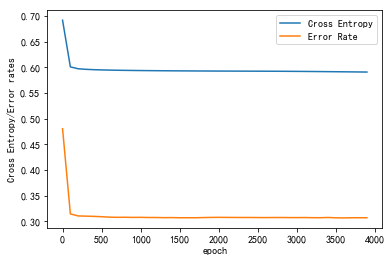

In [117]:
# 打印输出损失值
plt.plot(np.arange(len(losses))*100,losses, label = 'Cross Entropy')
plt.plot(np.arange(len(losses))*100, np.array(errors) / float(100), label = 'Error Rate')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy/Error rates')
plt.legend()

In [ ]:
# 读取测试数据

targets = test_targets['cnt']

targets = targets.values.reshape([len(targets), 1])
Y_labels = targets > np.mean(Y)
Y_labels = Y_labels.astype(int)
Y_labels = Y_labels.reshape(-1)
x = Variable(torch.FloatTensor(test_features.values))

# 打印神经网络预测的错误率
predict = neuc(x)
print(error_rate(predict.data.numpy(), Y_labels))

# 接下来，我们把预测正确的数据和错误的数据分别画出来，纵坐标分别是预测正确的概率和预测错误的概率
prob = predict.data.numpy()
rights = np.argmax(prob, 1) == Y_labels
wrongs = np.argmax(prob, 1) != Y_labels
right_labels = Y_labels[rights]
wrong_labels = Y_labels[wrongs]
probs = prob[rights, :]
probs1 = prob[wrongs, :]
rightness = [probs[i, right_labels[i]] for i in range(len(right_labels))]
right_index = np.arange(len(targets))[rights]
wrongness = [probs1[i, wrong_labels[i]] for i in range(len(wrong_labels))]
wrong_index = np.arange(len(targets))[wrongs]
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(right_index, rightness, '.', label='Right')
ax.plot(wrong_index, wrongness,'o',label='Wrong')

ax.legend()
plt.ylabel('Probabilities')

dates = pd.to_datetime(rides.loc[test_features.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

##  从单个广告角度维度出发探索数据

In [80]:
len(data.adid.unique())

2079

In [72]:
data_adid = data.groupby(['adid'])['click'].agg(['mean','count']).reset_index()

In [73]:
data_adid.head()

,adid,mean,count
0,1403645,0.061925,9027
1,1412379,0.111111,18
2,1412387,0.018868,106
3,1414879,0.000000,45
4,1427605,0.000000,1


In [158]:
data_adid['count'].describe()
data_adid['mean'].describe()

count    2079.000000
mean        0.079777
std         0.156595
min         0.000000
25%         0.000000
50%         0.004831
75%         0.066667
max         1.000000
Name: mean, dtype: float64

Text(0,0.5,'推送数')

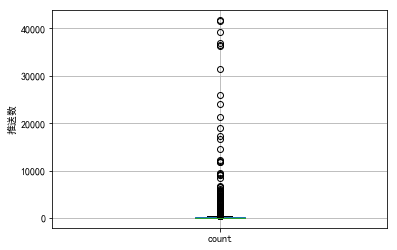

In [159]:
data_adid.sort_values(['count'],ascending = False).boxplot(column='count')
plt.ylabel('推送数')

Text(0.5,1,'点击数和频次直方图')

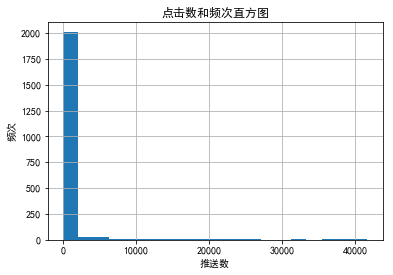

In [162]:
data_adid['count'].hist(bins=20)
plt.xlabel('推送数')
plt.ylabel('频次')
plt.title('点击数和频次直方图')

In [164]:
data_adid.sort_values(['count'],ascending = False)[:10]

,adid,mean,count
190,1537089,0.233907,41696
1074,1577888,0.043252,41455
269,1549584,0.232919,39211
219,1547112,0.301285,36799
621,1574388,0.295865,36466
553,1560128,0.304447,36246
1072,1577884,0.047343,31388
211,1546968,0.297859,26019
1126,1579122,0.253614,24001
293,1553872,0.224339,21365


In [170]:
##选取adid为1429239
data1429239 = data_adv[data_adv['adid']==1429239].reset_index(drop= True)
data1429239 = data1429239[['time','day','hour','click']]

In [166]:
data1429239.head()

,time,day,hour,click
0,2190041577,0,0,1
1,2190059792,0,5,1
2,2190063087,0,6,1
3,2190079578,0,11,1
4,2190082311,0,12,0


In [167]:
data1429239.groupby(['hour'])['click'].agg(['mean','count'])
##很多天怎么半？都是hour

,mean,count
hour,,
0,1.000000,2
1,1.000000,1
2,0.500000,2
3,1.000000,1
5,1.000000,2
6,1.000000,3
7,1.000000,4
8,1.000000,4
9,0.000000,2


In [183]:
data1585432 = data_adv[data_adv['adid']==1585432].reset_index(drop= True)
data1585432 = data1585432[['time','day','hour','click']]

In [173]:
data1585432.head()

,time,day,hour,click
0,2190526710,5,15,0
1,2190526716,5,15,0
2,2190526720,5,15,1
3,2190526722,5,15,1
4,2190526725,5,15,1


In [184]:
##
#tips 注意精确等于
def hour_normal1(hour):
    make = hour -15
    return make

def hour_normal2(hour):
    make = hour + 9
    return make

In [185]:
data1585432_01  =  data1585432[data1585432['day'] == 5]

In [186]:
data1585432_01['hour'] = data1585432_01.hour.apply(hour_normal1)

In [187]:
data1585432_02 =  data1585432[data1585432['day'] == 6]

In [188]:
data1585432_02['hour'] = data1585432_02.hour.apply(hour_normal2)

In [190]:
data1585432 = data1585432_01.append(data1585432_02)

In [191]:
data1585432X = data1585432.groupby(['hour'])['click'].agg(['mean','count']).reset_index()

In [192]:
data1585432X

,hour,mean,count
0,0,0.707071,99
1,1,0.746154,130
2,2,0.751592,157
3,3,0.740741,135
4,4,0.695364,151
5,5,0.791667,120
6,6,0.769231,78
7,7,0.710744,121
8,8,0.698113,106
9,9,0.676056,71


Text(0.5,1,'广告点击率和时间变化图')

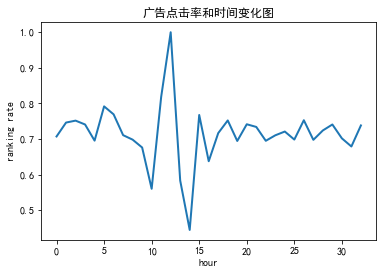

In [194]:
##探究广告的点击模式
plt.plot(data1585432X['hour'],data1585432X['mean'],lw=2)
plt.xlabel('hour')
plt.ylabel('ranking rate')
plt.title('广告点击率和时间变化图')

## 用随机森林进行预测